In [10]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
tf = 10
dt = 0.01
time = linspace(0, tf, int(tf / dt) + 1)

In [42]:
def control(t,y):
    ux = -2 * sin(t)
    uy =  cos(t)
    return array([ux,uy])

In [43]:
def sense(x):
    return x

In [44]:
def simulate(dt, x, u):
    x += dt * u
    return x

In [45]:
#Ellipse results, exercise 2.1
x = array([5., 2.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t,y)
    x = simulate(dt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

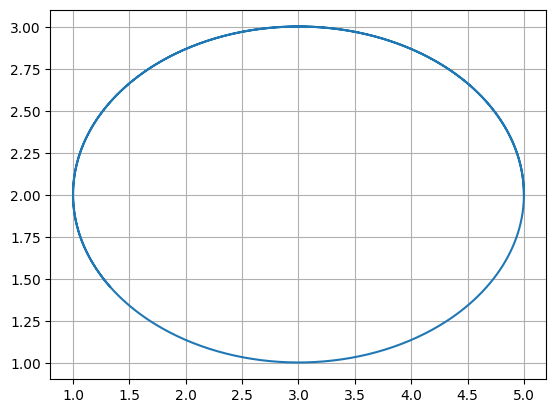

In [47]:
grid()
plot(x_log[:,0], x_log[:,1])

num_arrows = 5
arrow_indices = np.linspace(0, len(x_log) - 2, num_arrows, dtype=int)

In [17]:
def control_eight_curve(t,y):
    ux = cos(t)
    uy = -2 * sin(t) * sin(t) + 2 * cos(t) * cos(t)
    return array([ux,uy])

In [18]:
x2 = array([0., 0.])
x2_log = [copy(x2)]

for t in time:
    y = sense(x2)
    u = control_eight_curve(t,y)
    x2 = simulate(dt, x2, u)
    x2_log.append(copy(x2))

x2_log = array(x2_log)

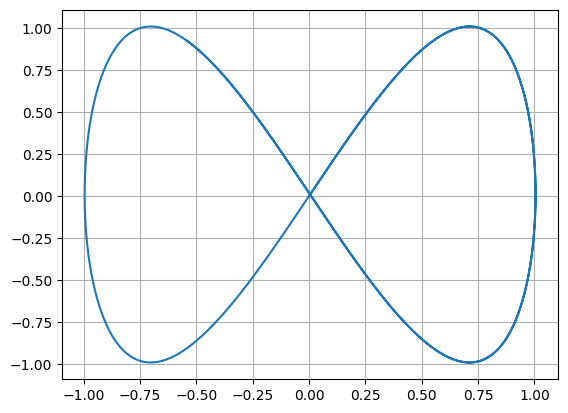

In [19]:
grid()
plot(x2_log[:,0], x2_log[:,1])

In [20]:
def return_wind(t, y):
    ux = 0.1 * t
    uy = 0.1 * t
    return array([ux,uy])

In [21]:
def control_circle(t,y):
    ux = -cos(t)
    uy = sin(t)
    return array([ux,uy])

In [22]:
def simulate_constant_wind(dt, x, u):
    x += dt * u 
    x += dt * return_wind(t, y)
    return x

In [23]:
#circle with constant wind
x3 = array([0., 0.])
x3_log = [copy(x3)]

for t in time:
    y = sense(x3)
    u = control_circle(t,y)
    x3 = simulate_constant_wind(dt, x3, u)
    x3_log.append(copy(x3))

x3_log = array(x3_log)

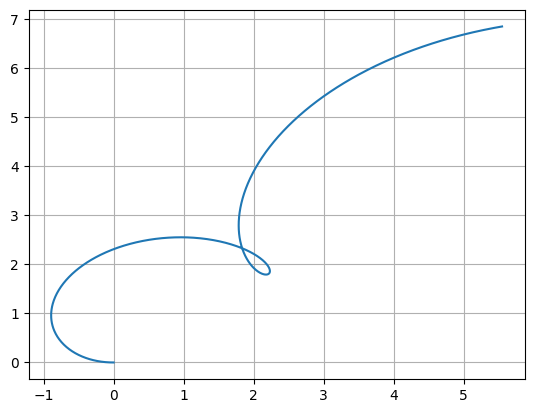

In [24]:
grid()
plot(x3_log[:,0], x3_log[:,1])

In [25]:
def return_random_wind(t, y):
    ux = random.normal(0.0, 0.1) * t
    uy = random.normal(0.0, 0.1) * t
    return array([ux,uy])

In [26]:
def simulate_random_wind(dt, x, u):
    x += dt * u 
    x += dt * return_random_wind(t, y)
    return x

In [31]:
#circle with random wind
x4 = array([0., 0.])
x4_log = [copy(x4)]

for t in time:
    y = sense(x4)
    u = control_circle(t,y)
    x4 = simulate_random_wind(dt, x4, u)
    x4_log.append(copy(x4))

x4_log = array(x4_log)

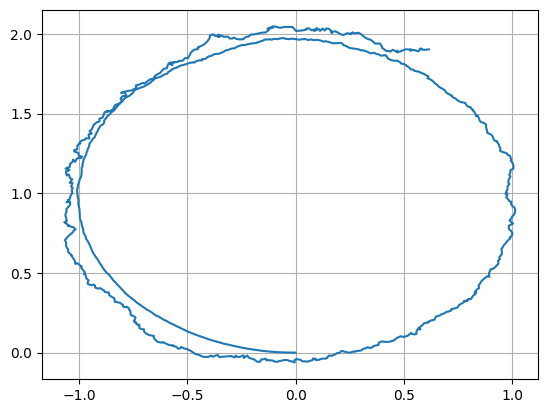

In [32]:
grid()
plot(x4_log[:,0], x4_log[:,1])